In [18]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
db_url = "../db/diabetes.csv"
dataset = pd.read_csv(db_url)
dataset.head(5)

In [ ]:
dataset.shape

In [ ]:
# Separamos las columnas. x sera las columnas independientes o las que usaremos para predecir
# mietnras que y será la columna que estamos tratando de predecir 

feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
x = dataset[feature_cols]
y = dataset['Outcome']

In [ ]:
# Dividios los datos de prueba y de entrenamiento

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [ ]:
# Aplicamos el modelo de regresion logisica 
# el predict nos regresa un array donde tiene valor 0 o 1, donde esta prediciendo los valores de Y en X_test
logreg = LogisticRegression(max_iter=len(X_train))
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [ ]:
y_pred

In [20]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[118,  12],
       [ 26,  36]])

Text(0.5, 257.44, 'Etiqueta de prediccion')

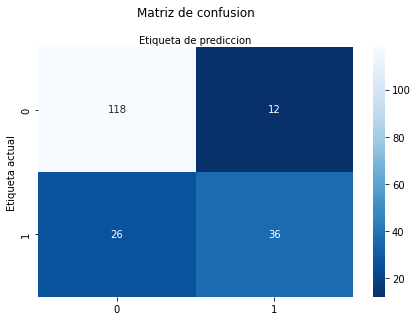

In [21]:
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues_r', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de confusion', y=1.1)
plt.ylabel('Etiqueta actual')
plt.xlabel('Etiqueta de prediccion')

In [22]:
print("Exactitud ", metrics.accuracy_score(y_test, y_pred))

Exactitud  0.8020833333333334
